In [60]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

In [61]:
if platform.system() == 'Windows':
    
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
    rc('font', family=font_name,size=8)
# Mac 인 경우
else:
    rc('font', family='AppleGothic',size=8)

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus']=False

In [62]:
# 2013~2020 데이터 로드
time_df = pd.read_csv('data/한국전력거래소_시간별 전력수요량_2013_2020.csv',encoding='cp949')
# 2021 데이터 로드
time21_df = pd.read_csv('data/한국전력거래소_시간별 전력수요량_20211231.csv',encoding='cp949')
# 데이터 크기 확인
time_df.shape
# 데이터 상단 출력
time_df.head()

,날짜,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2013-01-01,60178,57862,56165,55135,54450,54401,54147,52467,50469,...,49213,49357,50362,53115,55205,55437,55348,55790,58195,59330
1,2013-01-02,57067,55148,53983,53571,54027,55388,57753,60781,66494,...,72228,71945,72641,73387,72294,69989,67893,66504,67435,69275
2,2013-01-03,66263,64233,63194,62461,62649,63396,65098,67745,72982,...,75576,75168,75791,75922,75469,73118,70769,68726,69593,71346
3,2013-01-04,68403,66143,65051,64245,64152,64678,66494,68851,73835,...,74977,74275,74909,75344,74504,71957,69715,68155,68948,70834
4,2013-01-05,68053,65801,64439,63437,63135,63250,63658,63441,65640,...,64767,63613,63095,63230,64253,63353,62455,62314,64350,66687


In [63]:
# 13년~20년까지의 NaN값 확인하기
time_df.isnull().values.any()

False

In [64]:
#21년도 수요량파일의 NaN값 확인하기
time21_df.isnull().values.any()

False

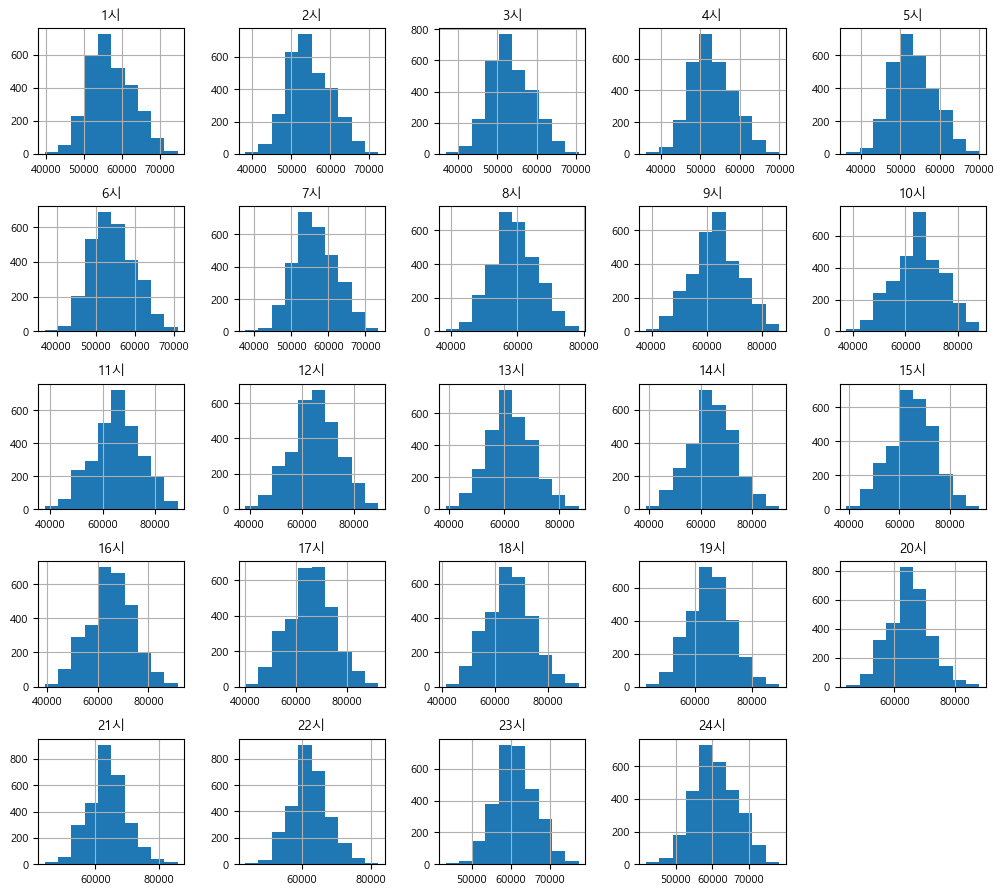

In [68]:
#시간별로 그래프 그려보기
time_df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

In [66]:
# 날짜 컬럼에서 2017이 포함된 행들만 추출하여 하나의 데이터프레임 생성
time17_df = time_df[time_df['날짜'].str.contains('2017')]
time17_df

,날짜,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
1461,2017-01-01,59234,56664,54641,53749,53796,54316,54493,53578,52785,...,50428,51022,52367,55357,57068,57046,56971,57063,58253,59177
1462,2017-01-02,55553,53134,51943,51677,52472,54270,57065,61532,68826,...,69814,69800,70566,70879,69959,68133,66122,64620,64605,65797
1463,2017-01-03,61953,59443,58027,57716,58741,60372,63159,67010,73123,...,70743,70694,72010,72965,72647,70709,68537,66837,66522,67664
1464,2017-01-04,63572,60823,59497,58980,59612,60988,63531,67219,73472,...,71131,70762,71702,72049,71335,69494,67928,66564,66365,67634
1465,2017-01-05,63445,60818,59471,59138,59783,61193,63801,67286,73592,...,74149,73638,74209,74070,72658,70638,68317,66571,66196,67384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2017-12-27,68857,66241,64987,64408,65030,66330,69242,74247,81601,...,79745,80091,81756,81837,79550,76953,74429,72342,71673,72928
1822,2017-12-28,69172,66608,65055,64475,64796,65918,68684,73273,80932,...,79718,79411,80059,79789,77681,74994,72645,70601,70035,71161
1823,2017-12-29,67603,64725,63014,62553,62857,63963,66091,70057,76773,...,73431,72674,72501,71965,70503,68890,67609,66038,66129,67919
1824,2017-12-30,64503,61876,60184,59574,59671,60392,60987,61467,63387,...,61924,61612,61609,62455,62599,61894,61216,60520,61367,63086


In [67]:
#2017년도와 2021년도 데이터프레임을 합쳐서 하나의 데이터프레임으로 저장한다
time1721_df = pd.concat([time17_df,time21_df])
time1721_df

,날짜,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
1461,2017-01-01,59234,56664,54641,53749,53796,54316,54493,53578,52785,...,50428,51022,52367,55357,57068,57046,56971,57063,58253,59177
1462,2017-01-02,55553,53134,51943,51677,52472,54270,57065,61532,68826,...,69814,69800,70566,70879,69959,68133,66122,64620,64605,65797
1463,2017-01-03,61953,59443,58027,57716,58741,60372,63159,67010,73123,...,70743,70694,72010,72965,72647,70709,68537,66837,66522,67664
1464,2017-01-04,63572,60823,59497,58980,59612,60988,63531,67219,73472,...,71131,70762,71702,72049,71335,69494,67928,66564,66365,67634
1465,2017-01-05,63445,60818,59471,59138,59783,61193,63801,67286,73592,...,74149,73638,74209,74070,72658,70638,68317,66571,66196,67384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,66465,64473,63140,62540,63122,65025,69117,76487,86054,...,88435,89654,90708,88653,85067,81527,78245,74696,73048,74217
361,2021-12-28,71059,68940,67701,67076,67184,68598,72033,78270,86809,...,87226,87627,88077,85978,83052,80011,77035,73589,71856,72875
362,2021-12-29,69651,67276,65941,65136,65534,66910,70309,75972,84106,...,82446,82500,83608,82009,79711,77646,75511,72342,70829,71882
363,2021-12-30,68581,66406,65155,64639,65121,66804,70225,75906,83494,...,81928,83044,84564,82901,80604,78216,76176,73142,71610,72472


In [49]:
#인덱스 번호 초기화
time1721_df.reset_index(drop=True, inplace=True)
time1721_df

,날짜,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2017-01-01,59234,56664,54641,53749,53796,54316,54493,53578,52785,...,50428,51022,52367,55357,57068,57046,56971,57063,58253,59177
1,2017-01-02,55553,53134,51943,51677,52472,54270,57065,61532,68826,...,69814,69800,70566,70879,69959,68133,66122,64620,64605,65797
2,2017-01-03,61953,59443,58027,57716,58741,60372,63159,67010,73123,...,70743,70694,72010,72965,72647,70709,68537,66837,66522,67664
3,2017-01-04,63572,60823,59497,58980,59612,60988,63531,67219,73472,...,71131,70762,71702,72049,71335,69494,67928,66564,66365,67634
4,2017-01-05,63445,60818,59471,59138,59783,61193,63801,67286,73592,...,74149,73638,74209,74070,72658,70638,68317,66571,66196,67384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2021-12-27,66465,64473,63140,62540,63122,65025,69117,76487,86054,...,88435,89654,90708,88653,85067,81527,78245,74696,73048,74217
726,2021-12-28,71059,68940,67701,67076,67184,68598,72033,78270,86809,...,87226,87627,88077,85978,83052,80011,77035,73589,71856,72875
727,2021-12-29,69651,67276,65941,65136,65534,66910,70309,75972,84106,...,82446,82500,83608,82009,79711,77646,75511,72342,70829,71882
728,2021-12-30,68581,66406,65155,64639,65121,66804,70225,75906,83494,...,81928,83044,84564,82901,80604,78216,76176,73142,71610,72472


In [52]:
#컬럼명 추출
time1721_df.columns

Index(['날짜', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시',
       '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시',
       '21시', '22시', '23시', '24시'],
      dtype='object')

In [70]:
# 1시 2시 3시 > 01:00 02:00 등으로 모두 변경
time1721_df.columns = ['날짜', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', 
                     '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',  '20:00', '21:00', '22:00',
                     '23:00', '24:00']


# time1721_df.colum(columns={'1시':'01:00'}, {'2시':'02:00'}, {'3시':'03:00'}, {'4시':'04:00'}, {'5시':'05:00'}, {'6시':'06:00'}, {'7시':'07:00'}, {'8시':'08:00'}, {'9시':'09:00'}, {'10시':'10:00'}, 
#           {'11시':'11:00'}, {'12시':'12:00'}, {'13시':'13:00'}, {'14시':'14:00'}, {'15시':'15:00'}, {'16시':'16:00'}, {'17시':'17:00'}, {'18시':'18:00'}, {'19시':'19:00'}, {'20시':'20:00'}, 
#           {'21시':'21:00'}, {'22시':'22:00'}, {'23시':'23:00'}, {'24시':'24:00'}, inplace=True)
# time1721_df.columns

time1721_df

,날짜,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,24:00
1461,2017-01-01,59234,56664,54641,53749,53796,54316,54493,53578,52785,...,50428,51022,52367,55357,57068,57046,56971,57063,58253,59177
1462,2017-01-02,55553,53134,51943,51677,52472,54270,57065,61532,68826,...,69814,69800,70566,70879,69959,68133,66122,64620,64605,65797
1463,2017-01-03,61953,59443,58027,57716,58741,60372,63159,67010,73123,...,70743,70694,72010,72965,72647,70709,68537,66837,66522,67664
1464,2017-01-04,63572,60823,59497,58980,59612,60988,63531,67219,73472,...,71131,70762,71702,72049,71335,69494,67928,66564,66365,67634
1465,2017-01-05,63445,60818,59471,59138,59783,61193,63801,67286,73592,...,74149,73638,74209,74070,72658,70638,68317,66571,66196,67384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,66465,64473,63140,62540,63122,65025,69117,76487,86054,...,88435,89654,90708,88653,85067,81527,78245,74696,73048,74217
361,2021-12-28,71059,68940,67701,67076,67184,68598,72033,78270,86809,...,87226,87627,88077,85978,83052,80011,77035,73589,71856,72875
362,2021-12-29,69651,67276,65941,65136,65534,66910,70309,75972,84106,...,82446,82500,83608,82009,79711,77646,75511,72342,70829,71882
363,2021-12-30,68581,66406,65155,64639,65121,66804,70225,75906,83494,...,81928,83044,84564,82901,80604,78216,76176,73142,71610,72472


In [116]:
#인덱스 번호들을 없앤 상태로 데이터프레임을 csv형태로 저장
time1721_df.to_csv("time1721_df.csv",index=False)

In [117]:
#저장한 데이터프레임을 다시 불러와본다.
time17212_df = pd.read_csv("time1721_df.csv")
time17212_df

,날짜,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,24:00
0,2017-01-01,59234,56664,54641,53749,53796,54316,54493,53578,52785,...,50428,51022,52367,55357,57068,57046,56971,57063,58253,59177
1,2017-01-02,55553,53134,51943,51677,52472,54270,57065,61532,68826,...,69814,69800,70566,70879,69959,68133,66122,64620,64605,65797
2,2017-01-03,61953,59443,58027,57716,58741,60372,63159,67010,73123,...,70743,70694,72010,72965,72647,70709,68537,66837,66522,67664
3,2017-01-04,63572,60823,59497,58980,59612,60988,63531,67219,73472,...,71131,70762,71702,72049,71335,69494,67928,66564,66365,67634
4,2017-01-05,63445,60818,59471,59138,59783,61193,63801,67286,73592,...,74149,73638,74209,74070,72658,70638,68317,66571,66196,67384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2021-12-27,66465,64473,63140,62540,63122,65025,69117,76487,86054,...,88435,89654,90708,88653,85067,81527,78245,74696,73048,74217
726,2021-12-28,71059,68940,67701,67076,67184,68598,72033,78270,86809,...,87226,87627,88077,85978,83052,80011,77035,73589,71856,72875
727,2021-12-29,69651,67276,65941,65136,65534,66910,70309,75972,84106,...,82446,82500,83608,82009,79711,77646,75511,72342,70829,71882
728,2021-12-30,68581,66406,65155,64639,65121,66804,70225,75906,83494,...,81928,83044,84564,82901,80604,78216,76176,73142,71610,72472


In [118]:
# melt 문을 사용하여 날짜값으로 정렬한다.
time17213_df = pd.melt(time17212_df, id_vars='날짜')

In [119]:
# 불러와본다
time17213_df

,날짜,variable,value
0,2017-01-01,01:00,59234
1,2017-01-02,01:00,55553
2,2017-01-03,01:00,61953
3,2017-01-04,01:00,63572
4,2017-01-05,01:00,63445
...,...,...,...
17515,2021-12-27,24:00,74217
17516,2021-12-28,24:00,72875
17517,2021-12-29,24:00,71882
17518,2021-12-30,24:00,72472


In [120]:
#날짜와 variable을 오름차순으로 정렬한다.
time17214_df = (time17213_df.sort_values(by=['날짜' , 'variable']))

In [100]:
time17214_df

,날짜,variable,value
0,2017-01-01,01:00,59234
730,2017-01-01,02:00,56664
1460,2017-01-01,03:00,54641
2190,2017-01-01,04:00,53749
2920,2017-01-01,05:00,53796
...,...,...,...
14599,2021-12-31,20:00,72976
15329,2021-12-31,21:00,71602
16059,2021-12-31,22:00,69383
16789,2021-12-31,23:00,68874


In [121]:
#컬럼 명을 변경
time17214_df.columns = ['날짜', '시간', '수요량']
time17214_df

,날짜,시간,수요량
0,2017-01-01,01:00,59234
730,2017-01-01,02:00,56664
1460,2017-01-01,03:00,54641
2190,2017-01-01,04:00,53749
2920,2017-01-01,05:00,53796
...,...,...,...
14599,2021-12-31,20:00,72976
15329,2021-12-31,21:00,71602
16059,2021-12-31,22:00,69383
16789,2021-12-31,23:00,68874


In [122]:
#다시 인덱스를 제거 한 뒤 fintime1721_df.csv로 저장을 하고 마지막으로 불러와본다.
time17214_df.to_csv("data/fintime1721_df.csv",index=False)

time17215_df = pd.read_csv("data/fintime1721_df.csv")
time17215_df

,날짜,시간,수요량
0,2017-01-01,01:00,59234
1,2017-01-01,02:00,56664
2,2017-01-01,03:00,54641
3,2017-01-01,04:00,53749
4,2017-01-01,05:00,53796
...,...,...,...
17515,2021-12-31,20:00,72976
17516,2021-12-31,21:00,71602
17517,2021-12-31,22:00,69383
17518,2021-12-31,23:00,68874
